In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams,rcParamsDefault
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import itertools

In [2]:
import datetime as dt
#Preprocessing,Feature Selection and search algorithms
from sklearn.preprocessing import StandardScaler,PowerTransformer,PolynomialFeatures,power_transform,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,RFECV,RFE
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

#ML Algorithms
from sklearn.linear_model import LinearRegression,ARDRegression,BayesianRidge,GammaRegressor,ridge_regression,SGDRegressor,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neural_network import MLPRegressor

#Evaluation Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

#Statsmodels
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Time Series Analysis
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [65]:
pd.set_option("display.max_columns",100)

In [27]:
sales = pd.read_csv('train.csv')
sales.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [3]:
sales913_women = pd.read_csv("sales913_Women.csv")
sales913_men = pd.read_csv("Sales913_men.csv")
sales913_other = pd.read_csv("sales913_other.csv")

sales14_men = pd.read_csv("sales14_men.csv")
sales14_women = pd.read_csv("sales14_Women.csv")
sales14_other = pd.read_csv("sales14_other.csv")

In [4]:
date = pd.date_range(start="2009-01-01",freq='M',periods=len(sales913_men))

sales913_women['Timestamp'] = date
sales913_women.set_index(keys='Timestamp',inplace=True)

sales913_other['Timestamp'] = date
sales913_other.set_index(keys='Timestamp',inplace=True)

sales913_men['Timestamp'] = date
sales913_men.set_index(keys='Timestamp',inplace=True)

# Men Clothing - Full Data Model

In [8]:
Y_men = sales913_men['Sales(In ThousandDollars)']
X_men = sales913_men[['Event','Earnings or wages  in dollars per hour','WeatherEvent','yieldperharvested acre']]

In [26]:
s_men = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_men,exog=X_men,mle_regression=False,
                                       seasonal_order=(1,1,0,12),
                                       time_varying_regression=True,
                                      order=(0,1,1)).fit()

In [27]:
test_14_men = sales14_men[['Event','Earnings or wages  in dollars per hour','WeatherEvent','yieldperharvested acre']]

In [30]:
yforecast_men = s_men.forecast(steps=len(sales14_men),exog=test_14_men)
yforecast_men.values

array([ 603.88944456,  597.47146112,  680.96490737,  787.96247718,
        789.61669295,  729.36422837,  686.44013151,  688.60094551,
        742.94461663,  798.37084653,  806.00066195, 1155.74161619])

In [31]:
dm = pd.DataFrame()
dm['index'] = np.arange(2,37,3)
dm['sales'] = yforecast_men.values

In [32]:
dm

,index,sales
0,2,603.889445
1,5,597.471461
2,8,680.964907
3,11,787.962477
4,14,789.616693
5,17,729.364228
6,20,686.440132
7,23,688.600946
8,26,742.944617
9,29,798.370847


# Women Clothing Full Data Model

In [7]:
Y_women = sales913_women['Sales(In ThousandDollars)']
X_women = sales913_women[['Monthly Nominal GDP Index (inMillion$)','Change(in%)','WeatherEvent']]

In [34]:
s_women = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_women,exog=X_women,mle_regression=False,measurement_error=True,state_error=True,
                                       seasonal_order=(1,1,0,12),
                                       time_varying_regression=True,
                                      order=(2,1,4)).fit()

In [35]:
test_14_women = sales14_women[['Monthly Nominal GDP Index (inMillion$)','Change(in%)','WeatherEvent']]

In [36]:
yforecast_women = s_women.forecast(steps=len(sales14_women),exog=test_14_women)
yforecast_women.values

array([2527.30148005, 3084.12293363, 3967.09357718, 3815.84049457,
       4121.27605326, 3399.43155134, 3275.02515516, 3502.50585078,
       3496.73825314, 3451.41030595, 3803.50679137, 4990.51227519])

In [37]:
dw = pd.DataFrame()
dw['index'] = np.arange(1,37,3)
dw['sales'] = yforecast_women.values

In [38]:
dw

,index,sales
0,1,2527.301480
1,4,3084.122934
2,7,3967.093577
3,10,3815.840495
4,13,4121.276053
5,16,3399.431551
6,19,3275.025155
7,22,3502.505851
8,25,3496.738253
9,28,3451.410306


# Other Clothing Full Data Model

In [6]:
Y_other = sales913_other['Sales(In ThousandDollars)']
X_other = sales913_other[['Temp avg (°C)','Visibility\xa0(km) avg','Change(in%)','Average upland planted(million acres)']]


In [40]:
s_other = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_other,exog=X_other,mle_regression=False,measurement_error=True,state_error=True,
                                       seasonal_order=(1,1,0,12),
                                       time_varying_regression=True,
                                      order=(0,1,0)).fit()

In [41]:
test_14_other = sales14_other[['Temp avg (°C)','Visibility\xa0(km) avg','Change(in%)','Average upland planted(million acres)']]

In [42]:
yforecast_other = s_other.forecast(steps=len(sales14_other),exog=test_14_other)
yforecast_other.values

array([1114.30230154, 1107.55223701, 1299.9009374 , 1197.96198093,
       1227.06584395, 1269.31260517, 1204.93084675, 1240.03385286,
       1085.64478762, 1128.70624079, 1289.44893984, 1608.09722175])

In [44]:
do = pd.DataFrame()
do['index'] = np.arange(3,37,3)
do['sales'] = yforecast_other.values

In [45]:
do

,index,sales
0,3,1114.302302
1,6,1107.552237
2,9,1299.900937
3,12,1197.961981
4,15,1227.065844
5,18,1269.312605
6,21,1204.930847
7,24,1240.033853
8,27,1085.644788
9,30,1128.706241


In [46]:
final = dw.append([dm,do]).sort_values(by='index')
sales14x = pd.DataFrame()
sales14x['Year']=np.arange(1,37)
sales14x['Sales(In ThousandDollars)'] = final['sales'].values
sales14x

,Year,Sales(In ThousandDollars)
0,1,2527.301480
1,2,603.889445
2,3,1114.302302
3,4,3084.122934
4,5,597.471461
5,6,1107.552237
6,7,3967.093577
7,8,680.964907
8,9,1299.900937
9,10,3815.840495


In [47]:
sales14x.to_csv("TimeSeries_3_models.csv",index=False)

In [51]:
s_other.aic
s_women.aic
s_men.aic

463.5168521070332

# Only Sales

## MEN Clothing

In [64]:
d = range(1,2) #We saw that differencing=1 did made the series stationary
p = q =  range(0,6)
pdq = list(itertools.product(p,d,q))
#pdq

In [65]:
frequency = 12 #Yearly
P = Q = range(0,6)
D = range(0,2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P,D,Q))]
#seasonal_pdq

In [67]:
sarima_aic_men = pd.DataFrame({'params':[],'seasonal_params':[],'AIC':[]})
sarima_aic_men

,params,seasonal_params,AIC


In [68]:

for params in pdq:
    for seasonal_params in seasonal_pdq:
        sarimax_men = sm.tsa.statespace.SARIMAX(endog=Y_men,
                                                order=params,
                                                seasonal_order=seasonal_params).fit()
        
        
        sarima_aic_men=sarima_aic_men.append({'params':params,'seasonal_params':seasonal_params,'AIC':sarimax_men.aic},ignore_index=True)

LinAlgError: LU decomposition error.

In [69]:
sarima_aic_men.sort_values(by='AIC').head(5)

,params,seasonal_params,AIC
9,"(0, 1, 0)","(0, 1, 3, 12)",479.879615
20,"(0, 1, 0)","(1, 1, 2, 12)",480.873676
8,"(0, 1, 0)","(0, 1, 2, 12)",480.892970
7,"(0, 1, 0)","(0, 1, 1, 12)",481.405623
10,"(0, 1, 0)","(0, 1, 4, 12)",481.741365
21,"(0, 1, 0)","(1, 1, 3, 12)",481.773033
6,"(0, 1, 0)","(0, 1, 0, 12)",482.776879
19,"(0, 1, 0)","(1, 1, 1, 12)",482.870455
22,"(0, 1, 0)","(1, 1, 4, 12)",483.705037
11,"(0, 1, 0)","(0, 1, 5, 12)",483.706666


In [104]:
s_men = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_men,measurement_error=True,state_error=True,
                                       seasonal_order=(0,1,3,12),
                                      order=(0,1,0)).fit(optimized=True,use_brute=True)
np.sqrt(s_men.mse)

125.96912937263873

In [102]:
s_men = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_men,exog=X_men,mle_regression=False,
                                       seasonal_order=(1,1,0,12),
                                       time_varying_regression=True,
                                      order=(0,1,1)).fit()
np.sqrt(s_men.mse)

220.43044068742844

## Women Clothing

In [81]:
sarima_aic_women = pd.DataFrame({'params':[],'seasonal_params':[],'AIC':[]})
sarima_aic_women

,params,seasonal_params,AIC


In [82]:

for params in pdq:
    for seasonal_params in seasonal_pdq:
        sarimax_women = sm.tsa.statespace.SARIMAX(endog=Y_women,
                                                order=params,
                                                seasonal_order=seasonal_params).fit()
        
        
        sarima_aic_women=sarima_aic_women.append({'params':params,'seasonal_params':seasonal_params,'AIC':sarimax_women.aic},ignore_index=True)

LinAlgError: LU decomposition error.

In [83]:
sarima_aic_women.sort_values(by='AIC').head(5)

,params,seasonal_params,AIC
6,"(0, 1, 0)","(0, 1, 0, 12)",654.212724
18,"(0, 1, 0)","(1, 1, 0, 12)",655.571494
7,"(0, 1, 0)","(0, 1, 1, 12)",655.624482
8,"(0, 1, 0)","(0, 1, 2, 12)",657.397753
9,"(0, 1, 0)","(0, 1, 3, 12)",657.497849


In [93]:
s_women = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_women,measurement_error=True,state_error=True,
                                       seasonal_order=(0,1,0,12),
                                      order=(0,1,0)).fit(optimized=True,use_brute=True)
s_women.mse

202343.87524897058

In [94]:
s_women = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_women,exog=X_women,mle_regression=False,measurement_error=True,state_error=True,
                                       seasonal_order=(1,1,0,12),
                                       time_varying_regression=True,
                                      order=(2,1,4)).fit(optimized=True,use_brute=True)
s_women.mse

172318.73222346182

## Other Clothing

In [95]:
sarima_aic_other = pd.DataFrame({'params':[],'seasonal_params':[],'AIC':[]})
sarima_aic_other

,params,seasonal_params,AIC


In [96]:
for params in pdq:
    for seasonal_params in seasonal_pdq:
        sarimax_other = sm.tsa.statespace.SARIMAX(endog=Y_other,
                                                order=params,
                                                seasonal_order=seasonal_params).fit()
        
        
        sarima_aic_other=sarima_aic_other.append({'params':params,'seasonal_params':seasonal_params,'AIC':sarimax_other.aic},ignore_index=True)

KeyboardInterrupt: 

In [97]:
sarima_aic_other.sort_values(by='AIC').head(5)

,params,seasonal_params,AIC
78,"(0, 1, 1)","(0, 1, 0, 12)",540.966686
79,"(0, 1, 1)","(0, 1, 1, 12)",541.255310
80,"(0, 1, 1)","(0, 1, 2, 12)",543.208227
81,"(0, 1, 1)","(0, 1, 3, 12)",545.042174
18,"(0, 1, 0)","(1, 1, 0, 12)",551.110369


In [100]:
s_other = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_other,error=True,state_error=True,
                                       seasonal_order=(0,1,0,12),
                                      order=(0,1,1)).fit(optimized=True,use_brute=True)
np.sqrt(s_other.mse)

186.14685332051735

In [101]:
s_other = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_other,exog=X_other,mle_regression=False,measurement_error=True,state_error=True,
                                       seasonal_order=(1,1,0,12),
                                       time_varying_regression=True,
                                      order=(0,1,0)).fit()
np.sqrt(s_other.mse)

176.55377869113485

# Forecast with only sales in MEN

In [109]:
s_men = statsmodels.tsa.api.statespace.SARIMAX(endog=Y_men,measurement_error=True,state_error=True,
                                       seasonal_order=(0,1,3,12),
                                      order=(0,1,0)).fit(optimized=True,use_brute=True)
np.sqrt(s_men.mse)
yforecast_men_uni = s_men.forecast(steps=len(sales14_men))
yforecast_men_uni.values

array([ 612.15163106,  599.2795694 ,  686.29384035,  753.49667969,
        766.71833963,  727.30029257,  682.02599809,  684.71884532,
        726.76157197,  784.78746264,  804.43966583, 1127.10831688])

In [110]:
dm_uni = pd.DataFrame()
dm_uni['index'] = np.arange(2,37,3)
dm_uni['sales'] = yforecast_men_uni.values

In [112]:
final = dw.append([dm_uni,do]).sort_values(by='index')
sales14x = pd.DataFrame()
sales14x['Year']=np.arange(1,37)
sales14x['Sales(In ThousandDollars)'] = final['sales'].values

In [113]:
sales14x.to_csv("TimeSeries_1univariate_models.csv",index=False)

# Univariate

# Holt-Winter

In [191]:

#Men
holt_winter_men = ExponentialSmoothing(Y_men,seasonal='multiplicative',trend='additive')
hw_model_men = holt_winter_men.fit(optimized=True,use_brute=True)
hw_predict_men = hw_model_men.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_men = mean_squared_error(Y_men, hw_predict_men, squared=False)
print("For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_men))

##########################################################
#Women
holt_winter_women = ExponentialSmoothing(Y_women,seasonal='multiplicative',trend='additive')
hw_model_women = holt_winter_women.fit(optimized=True,use_brute=True)
hw_predict_women = hw_model_women.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_women = mean_squared_error(Y_women, hw_predict_women, squared=False)
print("For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_women))

##########################################################
#Others
holt_winter_other = ExponentialSmoothing(Y_other,seasonal='additive',trend='additive')
hw_model_other = holt_winter_other.fit(optimized=True,use_brute=True)
hw_predict_other = hw_model_other.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_other = mean_squared_error(Y_other, hw_predict_other, squared=False)
print("For triple exponential smoothing OTHER(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_other))

For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is 24.0539
For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is 203.0062
For triple exponential smoothing OTHER(Level , trend and Seasonality Smoothing) rmse is 60.7906


In [148]:
yforecast_men   = hw_model_men.forecast(steps=len(sales14_men))
yforecast_women = hw_model_women.forecast(steps=len(sales14_women))
yforecast_other = hw_model_other.forecast(steps=len(sales14_other))

In [149]:
dm = pd.DataFrame()
dm['index'] = np.arange(2,37,3)
dm['sales'] = yforecast_men.values

dw = pd.DataFrame()
dw['index'] = np.arange(1,37,3)
dw['sales'] = yforecast_women.values


do = pd.DataFrame()
do['index'] = np.arange(3,37,3)
do['sales'] = yforecast_other.values

In [150]:
final = dw.append([dm,do]).sort_values(by='index')
sales14x = pd.DataFrame()
sales14x['Year']=np.arange(1,37)
sales14x['Sales(In ThousandDollars)'] = final['sales'].values

In [151]:
sales14x.to_csv("TimeSeries_Holt_Winter.csv",index=False)
#RMSE = 197.44592

In [215]:
result_hw_men = pd.DataFrame({'alpha':[],'beta':[],'gamma':[],'HoltWinterrmse':[]})

In [216]:
#MEN

for j in np.arange(0.01,0.80,0.01):
    for k in np.arange(0.01,0.80,0.01):
        holt_winter_men = ExponentialSmoothing(Y_men,seasonal='multiplicative',trend='additive')
        hw_model_men = holt_winter_men.fit(smoothing_trend=j,smoothing_seasonal=k,optimized=True,use_brute=True)
        hw_predict_men = hw_model_men.predict(start="2009-01-31",end='2013-12-31')
        hw_rmse_men = mean_squared_error(Y_men, hw_predict_men, squared=False)
        result_hw_men = result_hw_men.append({'alpha':0,'beta':j,'gamma':k,'HoltWinterrmse':hw_rmse_men},ignore_index=True)

In [217]:
result_hw_men.sort_values(by='HoltWinterrmse').head(5)
# the value zero corresponds to optimized=True parameter in .fit()  Do not initialise any value

,alpha,beta,gamma,HoltWinterrmse
6162,0.0,0.79,0.01,22.775583
6083,0.0,0.78,0.01,22.785487
6004,0.0,0.77,0.01,22.795605
5925,0.0,0.76,0.01,22.805943
5846,0.0,0.75,0.01,22.816508


In [213]:
holt_winter_men = ExponentialSmoothing(Y_men,seasonal='multiplicative',trend='additive')
hw_model_men = holt_winter_men.fit( smoothing_trend=0.2,smoothing_seasonal=0.29,optimized=True,use_brute=True)
hw_predict_men = hw_model_men.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_men = mean_squared_error(Y_men, hw_predict_men, squared=False)
print("For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_men))

For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is 26.8270


In [218]:
result_hw_women = pd.DataFrame({'alpha':[],'beta':[],'gamma':[],'HoltWinterrmse':[]})

In [219]:
#WOMEN

for j in np.arange(0.01,0.80,0.01):
    for k in np.arange(0.01,0.80,0.01):
        holt_winter_women = ExponentialSmoothing(Y_women,seasonal='multiplicative',trend='additive')
        hw_model_women = holt_winter_women.fit(smoothing_trend=j,smoothing_seasonal=k,optimized=True,use_brute=True)
        hw_predict_women = hw_model_women.predict(start="2009-01-31",end='2013-12-31')
        hw_rmse_women = mean_squared_error(Y_women, hw_predict_women, squared=False)
        result_hw_women = result_hw_women.append({'alpha':0,'beta':j,'gamma':k,'HoltWinterrmse':hw_rmse_women},ignore_index=True)            

In [220]:
result_hw_women.sort_values(by='HoltWinterrmse').head(5)

,alpha,beta,gamma,HoltWinterrmse
3,0.0,0.01,0.04,146.366734
869,0.0,0.12,0.01,146.920856
1027,0.0,0.14,0.01,147.903139
556,0.0,0.08,0.04,148.092538
162,0.0,0.03,0.05,149.262542


In [221]:
result_hw_other = pd.DataFrame({'alpha':[],'beta':[],'gamma':[],'HoltWinterrmse':[]})

In [222]:
#Other

for j in np.arange(0.01,0.80,0.01):
    for k in np.arange(0.01,0.80,0.01):
        holt_winter_other = ExponentialSmoothing(Y_other,seasonal='additive',trend='additive')
        hw_model_other = holt_winter_other.fit(smoothing_trend=j,smoothing_seasonal=k,optimized=True,use_brute=True)
        hw_predict_other = hw_model_other.predict(start="2009-01-31",end='2013-12-31')
        hw_rmse_other = mean_squared_error(Y_other, hw_predict_other, squared=False)
        result_hw_other = result_hw_other.append({'alpha':0,'beta':j,'gamma':k,'HoltWinterrmse':hw_rmse_other},ignore_index=True)                        

In [223]:
result_hw_other.sort_values(by='HoltWinterrmse').head(5)

,alpha,beta,gamma,HoltWinterrmse
0,0.0,0.01,0.01,56.759014
79,0.0,0.02,0.01,57.007275
1,0.0,0.01,0.02,57.016544
158,0.0,0.03,0.01,57.225607
80,0.0,0.02,0.02,57.265544


# Tunned Holt Winter

In [273]:

#Men
holt_winter_men = ExponentialSmoothing(Y_men,seasonal='multiplicative',trend='additive')
hw_model_men = holt_winter_men.fit(smoothing_trend=0.79,optimized=True,use_brute=True)
hw_predict_men = hw_model_men.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_men = mean_squared_error(Y_men, hw_predict_men, squared=False)
print("For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_men))

##########################################################
#Women
holt_winter_women = ExponentialSmoothing(Y_women,seasonal='multiplicative',trend='additive')
hw_model_women = holt_winter_women.fit(smoothing_trend=0.7,optimized=True,use_brute=True)
hw_predict_women = hw_model_women.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_women = mean_squared_error(Y_women, hw_predict_women, squared=False)
print("For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_women))

##########################################################
#Others
holt_winter_other = ExponentialSmoothing(Y_other,seasonal='additive',trend='additive')
hw_model_other = holt_winter_other.fit(smoothing_trend=0.01,optimized=True,use_brute=True)
hw_predict_other = hw_model_other.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_other = mean_squared_error(Y_other, hw_predict_other, squared=False)
print("For triple exponential smoothing OTHER(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_other))

For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is 22.6486
For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is 248.4066
For triple exponential smoothing OTHER(Level , trend and Seasonality Smoothing) rmse is 61.0338


In [274]:
yforecast_men   = hw_model_men.forecast(steps=len(sales14_men))
yforecast_women = hw_model_women.forecast(steps=len(sales14_women))
yforecast_other = hw_model_other.forecast(steps=len(sales14_other))

In [275]:
dm = pd.DataFrame()
dm['index'] = np.arange(2,37,3)
dm['sales'] = yforecast_men.values

dw = pd.DataFrame()
dw['index'] = np.arange(1,37,3)
dw['sales'] = yforecast_women.values


do = pd.DataFrame()
do['index'] = np.arange(3,37,3)
do['sales'] = yforecast_other.values

In [276]:
final = dw.append([dm,do]).sort_values(by='index')
sales14x = pd.DataFrame()
sales14x['Year']=np.arange(1,37)
sales14x['Sales(In ThousandDollars)'] = final['sales'].values

In [277]:
sales14x.to_csv("TimeSeries_Holt_Winter_Tunned.csv",index=False)
# RMSE = 165.15720
#hw_model_men = holt_winter_men.fit(smoothing_trend=0.79,optimized=True,use_brute=True)      #Good Model for 32% Data
#hw_model_women = holt_winter_women.fit(smoothing_trend=0.7,optimized=True,use_brute=True)
#hw_model_other = holt_winter_other.fit(smoothing_trend=0.01,optimized=True,use_brute=True)


# RMSE = 160.19216
#hw_model_men = holt_winter_men.fit(smoothing_trend=0.79,optimized=True,use_brute=True)
#hw_model_women = holt_winter_women.fit(smoothing_trend=0.75,optimized=True,use_brute=True)
#hw_model_other = holt_winter_other.fit(smoothing_trend=0.01,optimized=True,use_brute=True)

# RMSE = 159.89117
#hw_model_men = holt_winter_men.fit(smoothing_trend=0.6,optimized=True,use_brute=True)
#hw_model_women = holt_winter_women.fit(smoothing_trend=0.75,optimized=True,use_brute=True)
#hw_model_other = holt_winter_other.fit(smoothing_trend=0.00,optimized=True,use_brute=True)

# Tunned Holt Winter -Model II -FINAL BEST MODEL FOR 68% Data

In [11]:

#Men
holt_winter_men = ExponentialSmoothing(Y_men,seasonal='multiplicative',trend='additive')
hw_model_men = holt_winter_men.fit(smoothing_trend=0,optimized=True,use_brute=True)
hw_predict_men = hw_model_men.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_men = mean_squared_error(Y_men, hw_predict_men, squared=False)
print("For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_men))

##########################################################
#Women
holt_winter_women = ExponentialSmoothing(Y_women,seasonal='multiplicative',trend='additive')
hw_model_women = holt_winter_women.fit(smoothing_trend=0.8102901,optimized=True,use_brute=True)
hw_predict_women = hw_model_women.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_women = mean_squared_error(Y_women, hw_predict_women, squared=False)
print("For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_women))

##########################################################
#Others
holt_winter_other = ExponentialSmoothing(Y_other,seasonal='additive',trend='additive')
hw_model_other = holt_winter_other.fit(smoothing_trend=-0.985,optimized=True,use_brute=True)
hw_predict_other = hw_model_other.predict(start="2009-01-31",end='2013-12-31')
hw_rmse_other = mean_squared_error(Y_other, hw_predict_other, squared=False)
print("For triple exponential smoothing OTHER(Level , trend and Seasonality Smoothing) rmse is %.4f"%(hw_rmse_other))

For triple exponential smoothing MEN(Level , trend and Seasonality Smoothing) rmse is 24.1548
For triple exponential smoothing WOMEN(Level , trend and Seasonality Smoothing) rmse is 247.5291
For triple exponential smoothing OTHER(Level , trend and Seasonality Smoothing) rmse is 62.9317


In [12]:
yforecast_men   = hw_model_men.forecast(steps=len(sales14_men))
yforecast_women = hw_model_women.forecast(steps=len(sales14_women))
yforecast_other = hw_model_other.forecast(steps=len(sales14_other))

In [13]:
dm = pd.DataFrame()
dm['index'] = np.arange(2,37,3)
dm['sales'] = yforecast_men.values

dw = pd.DataFrame()
dw['index'] = np.arange(1,37,3)
dw['sales'] = yforecast_women.values


do = pd.DataFrame()
do['index'] = np.arange(3,37,3)
do['sales'] = yforecast_other.values

In [14]:
final = dw.append([dm,do]).sort_values(by='index')
sales14x = pd.DataFrame()
sales14x['Year']=np.arange(1,37)
sales14x['Sales(In ThousandDollars)'] = final['sales'].values

In [552]:
sales14x.to_csv("TimeSeries_Holt_Winter_Tunned_.csv",index=False)

In [553]:
# RMSE 138.32616
#hw_model_men = holt_winter_men.fit(smoothing_trend=0.0,optimized=True,use_brute=True)
#hw_model_women = holt_winter_women.fit(smoothing_trend=0.81029,optimized=True,use_brute=True)
#hw_model_other = holt_winter_other.fit(smoothing_trend=-0.99,optimized=True,use_brute=True)

#RMSE 137.81696
#hw_model_men = holt_winter_men.fit(smoothing_trend=0,optimized=True,use_brute=True)
#hw_model_women = holt_winter_women.fit(smoothing_trend=0.8102901,optimized=True,use_brute=True)
#hw_model_other = holt_winter_other.fit(smoothing_trend=-0.985,optimized=True,use_brute=True)



# Inferences and Analysis

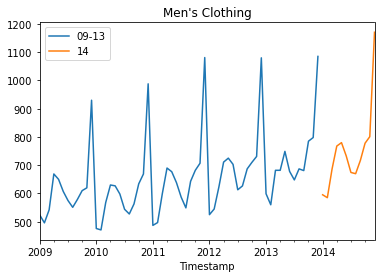

In [21]:
Y_men.plot()
yforecast_men.plot()
plt.legend(['09-13','14'])
plt.title("Men's Clothing")
plt.show()

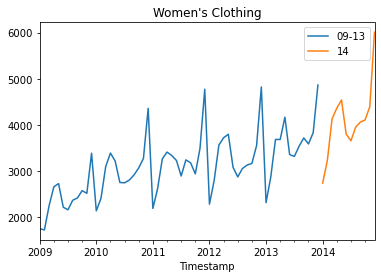

In [23]:
Y_women.plot()
yforecast_women.plot()
plt.legend(['09-13','14'])
plt.title("Women's Clothing")
plt.show()

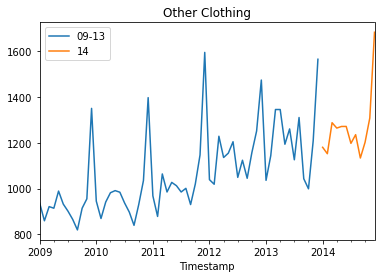

In [24]:
Y_other.plot()
yforecast_other.plot()
plt.legend(['09-13','14'])
plt.title("Other Clothing")
plt.show()

# Bivariate and MultiVariate Analysis

### Factors Influencing Sales for men-category:  Weather Event and Year

<AxesSubplot:xlabel='WeatherEvent', ylabel='Sales(In ThousandDollars)'>

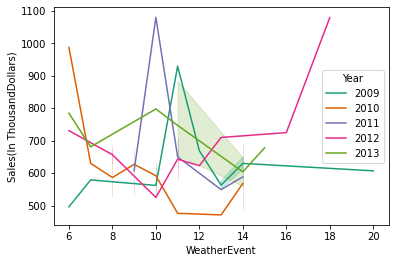

In [38]:
sns.lineplot(y=sales913_men['Sales(In ThousandDollars)'],x=sales913_men['WeatherEvent'],hue=sales913_men['Year'],palette='Dark2')

#Weather Event : Rain,Fog,Snow

#Men do NOt Prefer to buy cloths during months where more harsh weather conditions are present
#In the year 2012 During december(Christmas more sales)


### Average Sales of Products across months

In [49]:
avg_sales = pd.crosstab(index=sales['Month'],columns=sales['ProductCategory'],values=sales['Sales(In ThousandDollars)'],aggfunc='mean').reset_index()
avg_sales

ProductCategory,Month,MenClothing,OtherClothing,WomenClothing
0,1,522.200000,984.80,2139.40
1,2,513.800000,937.50,2486.80
2,3,602.800000,1100.20,3175.40
3,4,683.600000,1055.75,3420.75
4,5,685.600000,1071.20,3452.60
5,6,646.500000,1095.50,2930.80
6,7,593.400000,999.60,2801.20
7,8,595.666667,1039.60,3004.20
8,9,630.600000,935.20,3060.50
9,10,684.200000,1005.50,3102.00


<AxesSubplot:xlabel='Month', ylabel='Sales(In ThousandDollars)'>

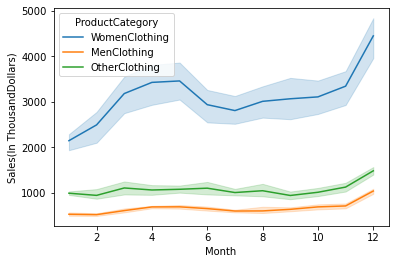

In [61]:
sns.lineplot(x=sales['Month'], y=sales['Sales(In ThousandDollars)'],hue=sales['ProductCategory'])
#Women's Clothing has higher sales

<AxesSubplot:xlabel='Month', ylabel='Sales(In ThousandDollars)'>

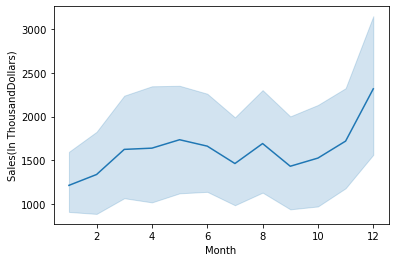

In [63]:
sns.lineplot(sales['Month'],sales['Sales(In ThousandDollars)'])
#With all categories

### With other Features

In [66]:
sales913_men.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars),Event,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-31,2009,1,MenClothing,524.0,2,-2.0,-10.0,54.0,16.0,10,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
2009-02-28,2009,2,MenClothing,496.0,2,3.0,-6.5,50.0,16.0,6,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2009-03-31,2009,3,MenClothing,542.0,0,7.0,-1.0,56.0,16.0,10,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
2009-04-30,2009,4,MenClothing,669.0,1,11.5,2.5,54.5,16.0,12,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
2009-05-31,2009,5,MenClothing,650.0,2,17.0,11.0,69.0,15.0,14,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


###### Men

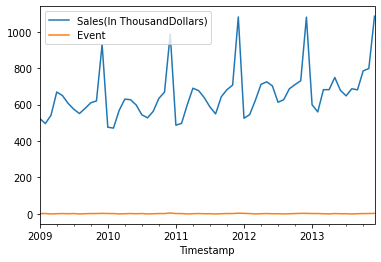

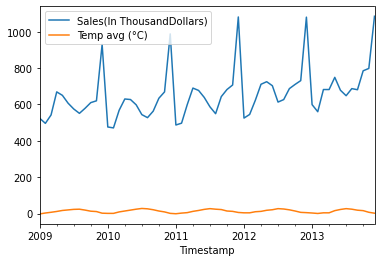

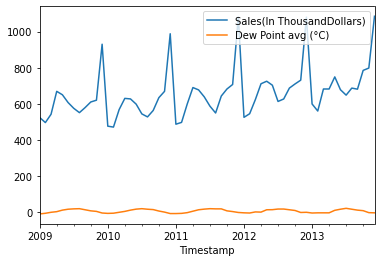

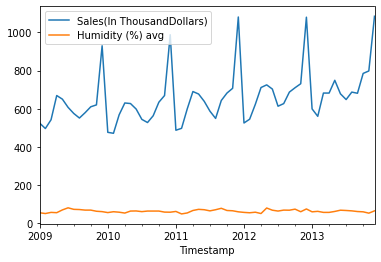

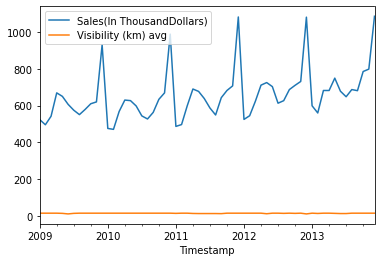

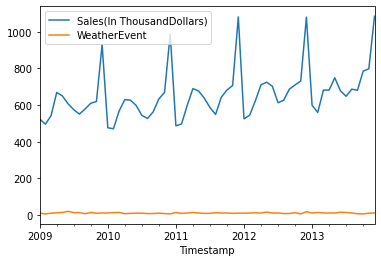

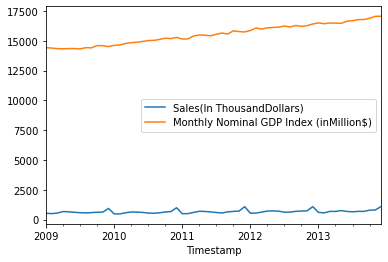

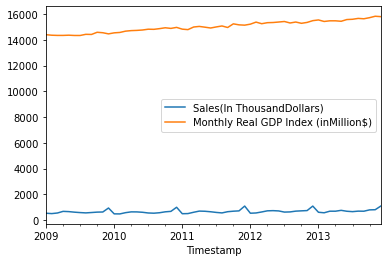

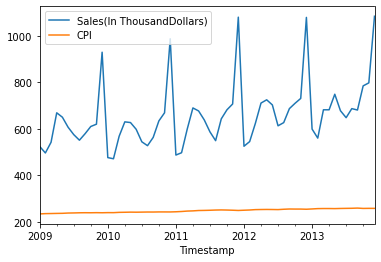

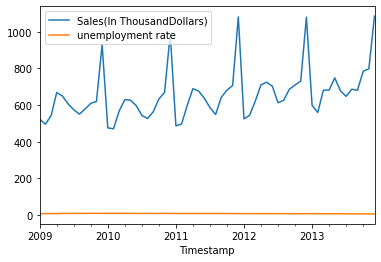

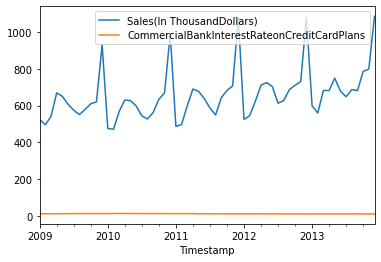

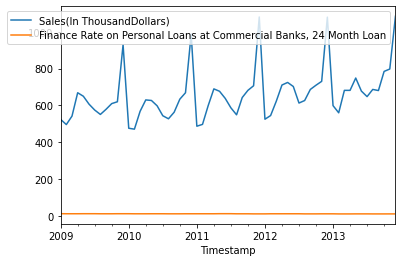

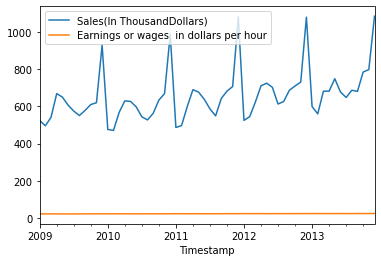

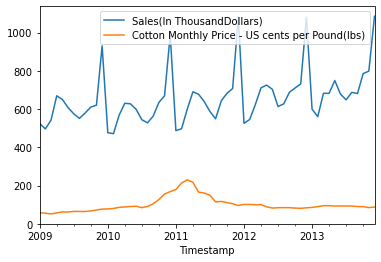

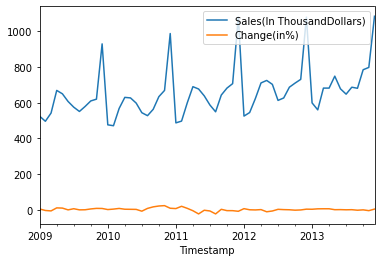

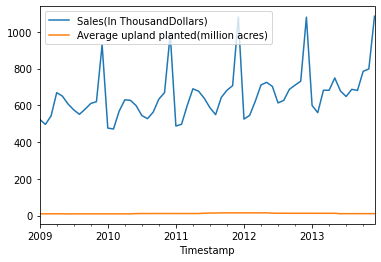

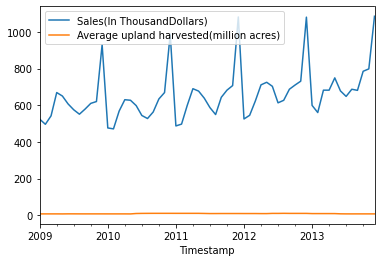

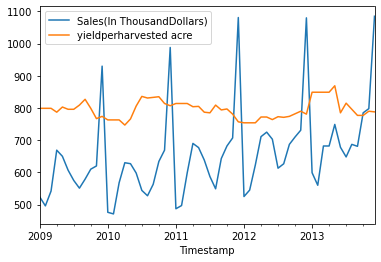

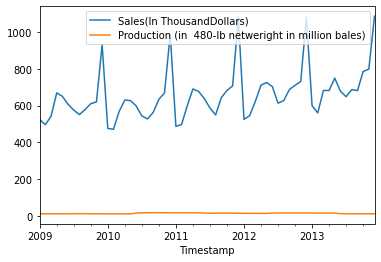

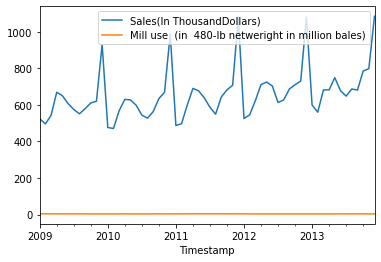

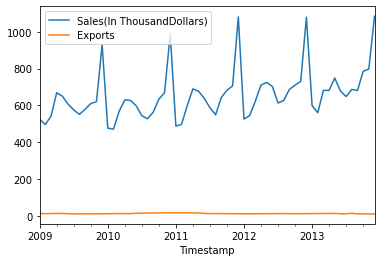

In [69]:
for i in sales913_men.drop(['Year','Month','ProductCategory','Sales(In ThousandDollars)'],axis=1).columns:
    sales913_men['Sales(In ThousandDollars)'].plot()
    sales913_men[i].plot()
    plt.legend()
    plt.show()
    

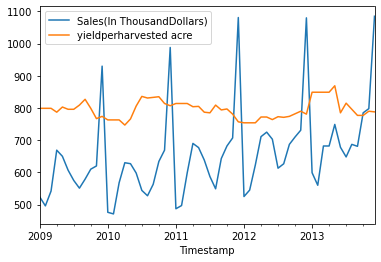

In [70]:
sales913_men['Sales(In ThousandDollars)'].plot()
sales913_men['yieldperharvested acre'].plot()
plt.legend()
plt.show()

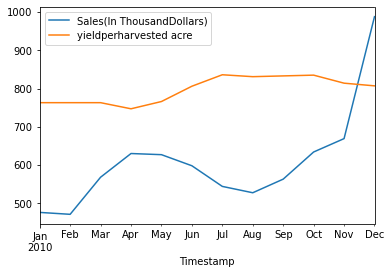

In [76]:
salest_men = sales913_men[sales913_men['Year']==2010]
salest_men['Sales(In ThousandDollars)'].plot()
salest_men['yieldperharvested acre'].plot()
plt.legend()
plt.show()
#Some Relation with yield harvested indicating that the stores data could be of villages and small towns of US

##### Women

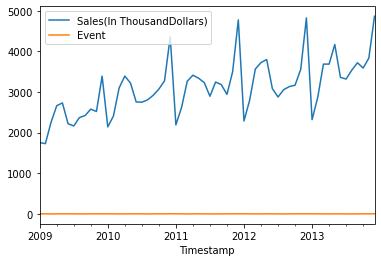

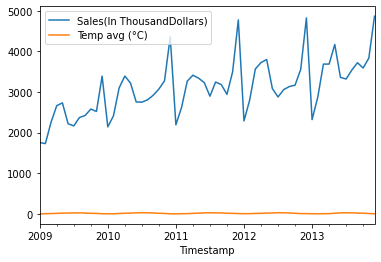

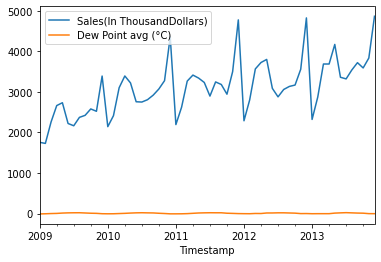

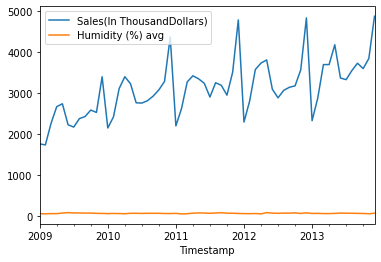

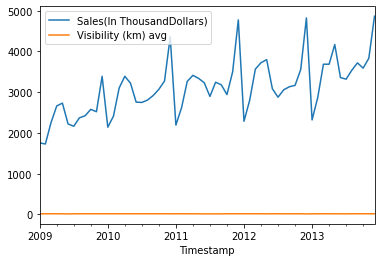

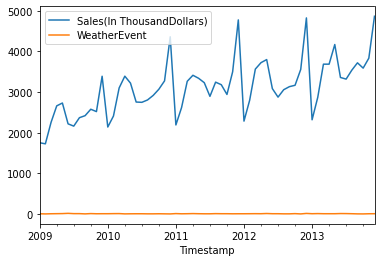

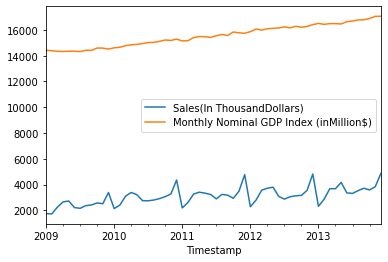

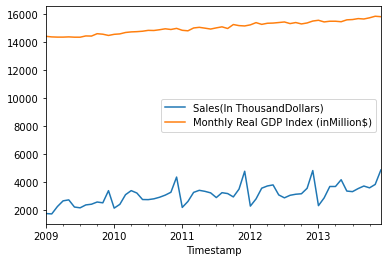

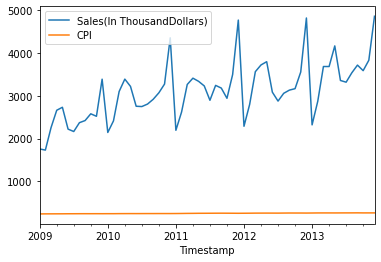

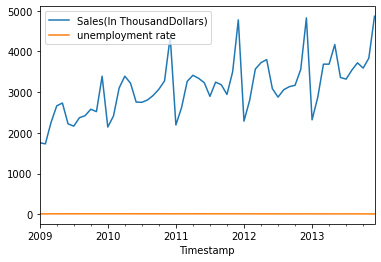

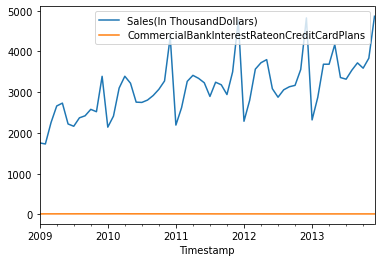

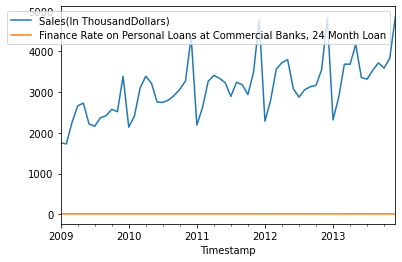

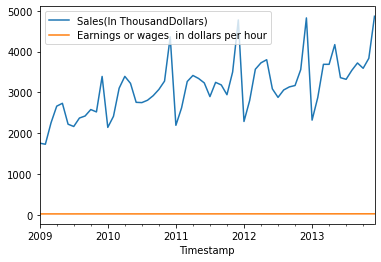

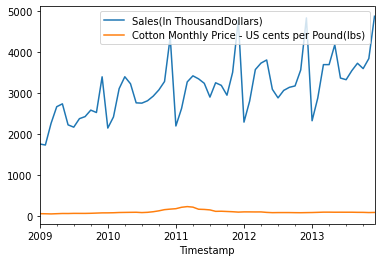

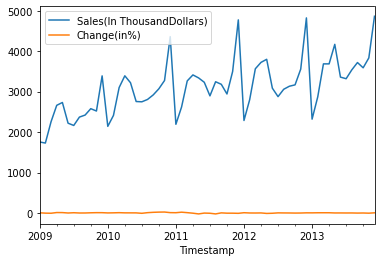

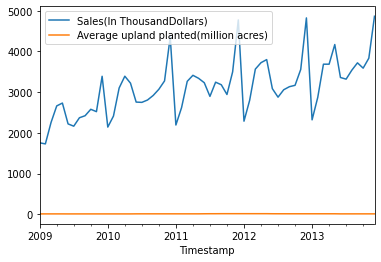

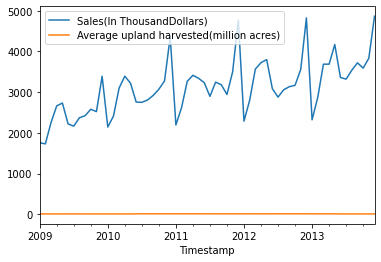

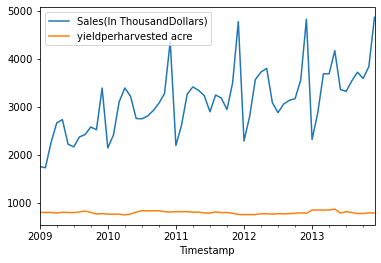

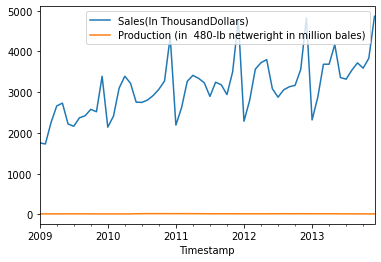

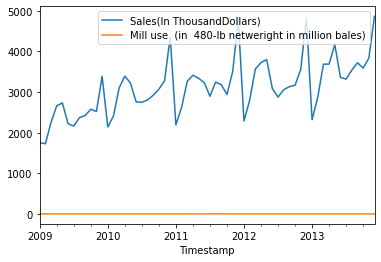

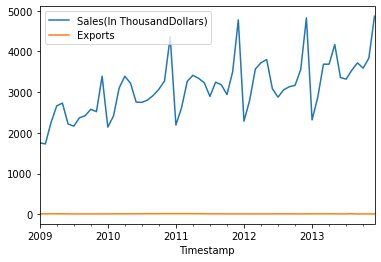

In [73]:
for i in sales913_women.drop(['Year','Month','ProductCategory','Sales(In ThousandDollars)'],axis=1).columns:
    sales913_women['Sales(In ThousandDollars)'].plot()
    sales913_women[i].plot()
    plt.legend()
    plt.show()
#With increasing Trend in GDP more sales over the years

##### Other

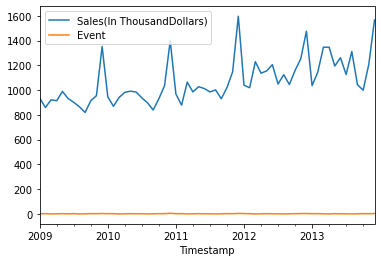

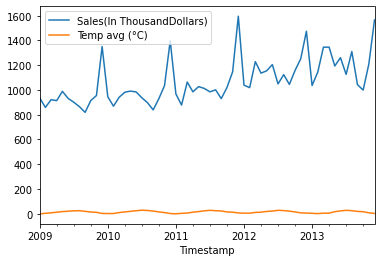

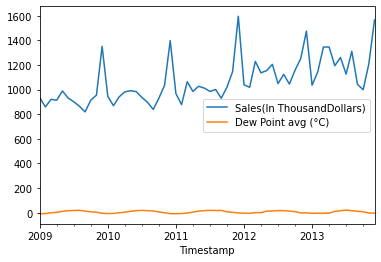

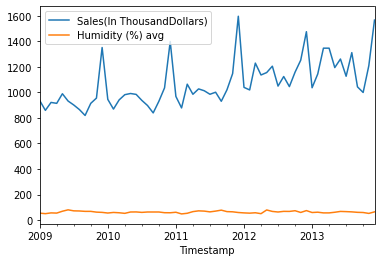

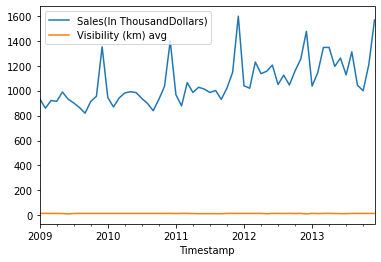

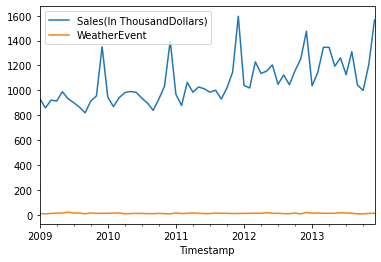

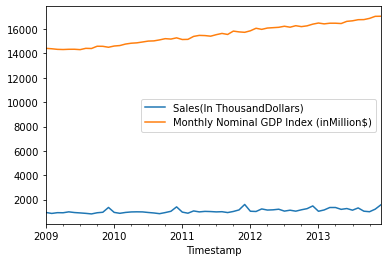

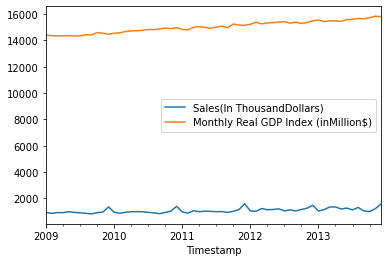

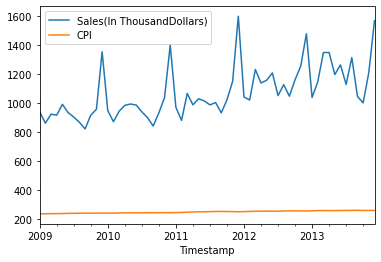

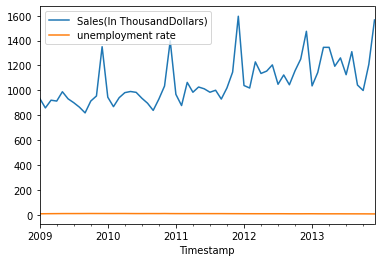

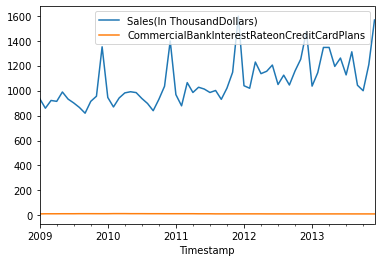

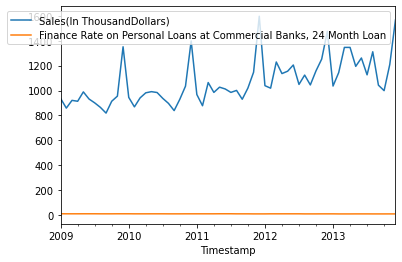

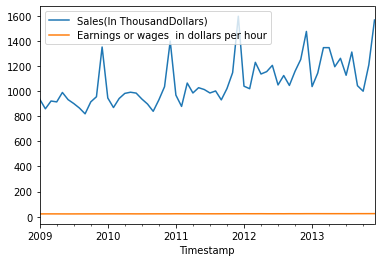

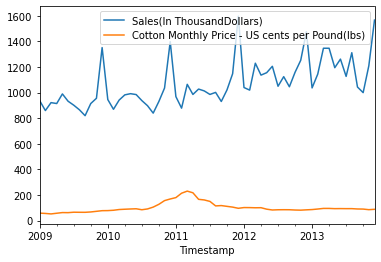

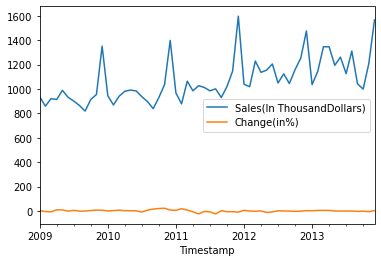

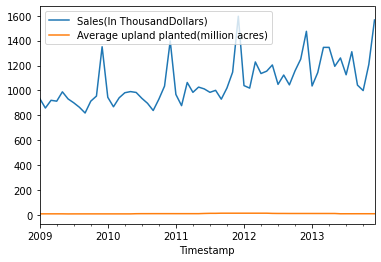

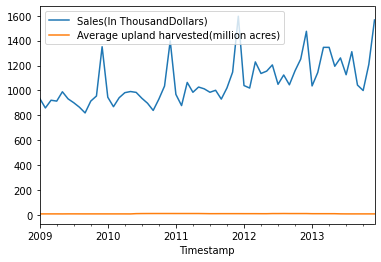

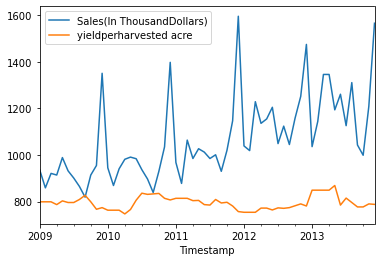

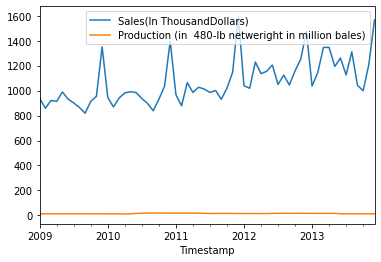

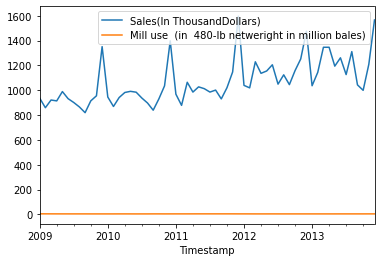

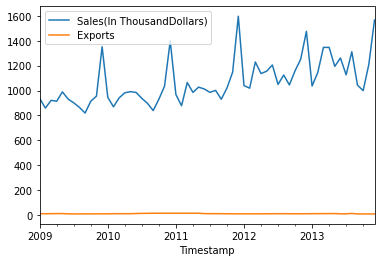

In [77]:
for i in sales913_other.drop(['Year','Month','ProductCategory','Sales(In ThousandDollars)'],axis=1).columns:
    sales913_other['Sales(In ThousandDollars)'].plot()
    sales913_other[i].plot()
    plt.legend()
    plt.show()
#Again Other Clothing Sales has some influence of yield harvested over the years